# Calibration & Fusion
In this laboratory we will focus on calibration and fusion of scores of binary classifiers, we will analyze
the K-fold cross-validation approach and we will introduce the evaluation set used for our project.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mean_covariance import vcol, vrow


from Bayes_decisions_Model_evaluation import computeEmpiricalBayesRisk_Normalized, computeMinEmpiricalBayesRisk_Normalized, plotBayesErrorPlots
from LogisticRegression.LR import trainLogReg_PriorWeighted


In [9]:
#load scores_1
scores_1 = np.load("../data/scores_1.npy")
print(f"Shape of scores_1: {scores_1.shape}")
#load scores_2
scores_2 = np.load("../data/scores_2.npy")
print(f"Shape of scores_2: {scores_2.shape}")
#load LVAL, so validation labels
LVAL = np.load("../data/labels.npy")
print(f"Shape of LVAL: {LVAL.shape}")

Shape of scores_1: (2000,)
Shape of scores_2: (2000,)
Shape of LVAL: (2000,)


minDCF for scores_1: 0.20428671869296186, DCF: 0.29772502472799206
minDCF for scores_2: 0.31056257807194676, DCF: 0.3280816978854441


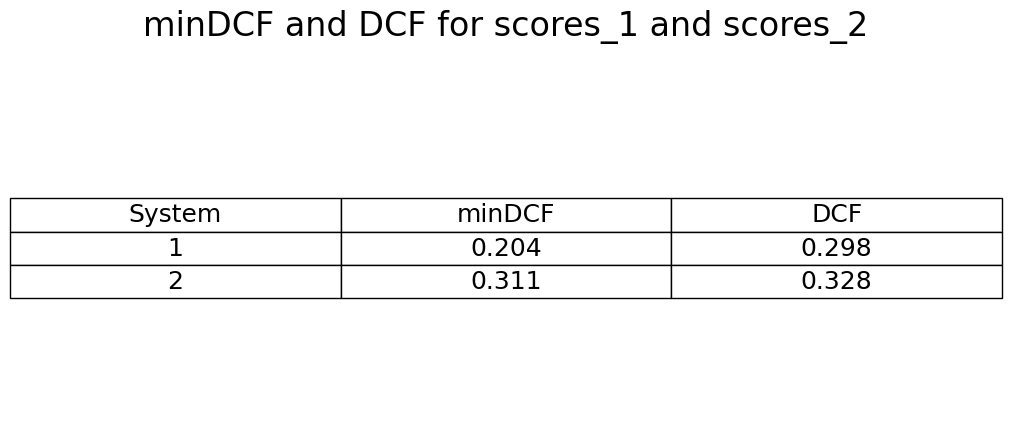

In [10]:
appPriorTrue = 0.2 #target app prior for class true
minDCF_1 = computeMinEmpiricalBayesRisk_Normalized(scores_1, LVAL, appPriorTrue, 1.0, 1.0)
DCF_1 = computeEmpiricalBayesRisk_Normalized(scores_1, LVAL, appPriorTrue, 1.0, 1.0)

minDCF_2 = computeMinEmpiricalBayesRisk_Normalized(scores_2, LVAL, appPriorTrue, 1.0, 1.0)
DCF_2 = computeEmpiricalBayesRisk_Normalized(scores_2, LVAL, appPriorTrue, 1.0, 1.0)

print(f"minDCF for scores_1: {minDCF_1}, DCF: {DCF_1}")
print(f"minDCF for scores_2: {minDCF_2}, DCF: {DCF_2}")

#table
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

table_data = [
    ["System", "minDCF", "DCF"],
    ["1", f"{minDCF_1:.3f}", f"{DCF_1:.3f}"],
    ["2", f"{minDCF_2:.3f}", f"{DCF_2:.3f}"]
]

table = ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(2, 2)
plt.title("minDCF and DCF for scores_1 and scores_2", fontsize=24, pad=20)
plt.show()

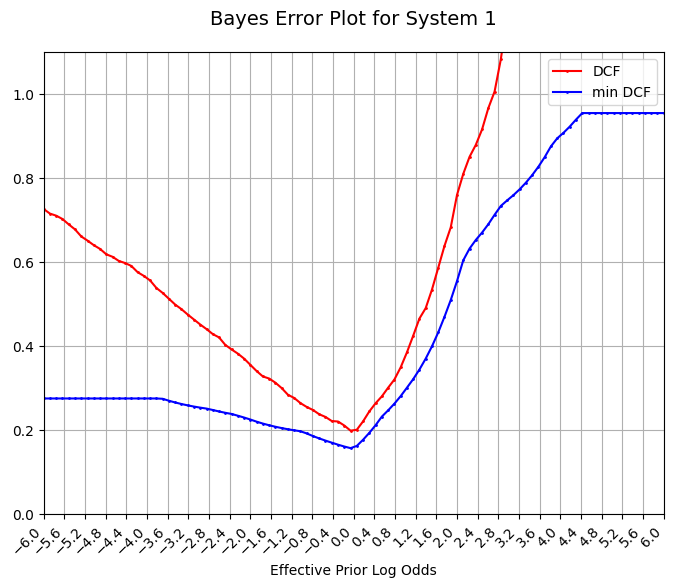

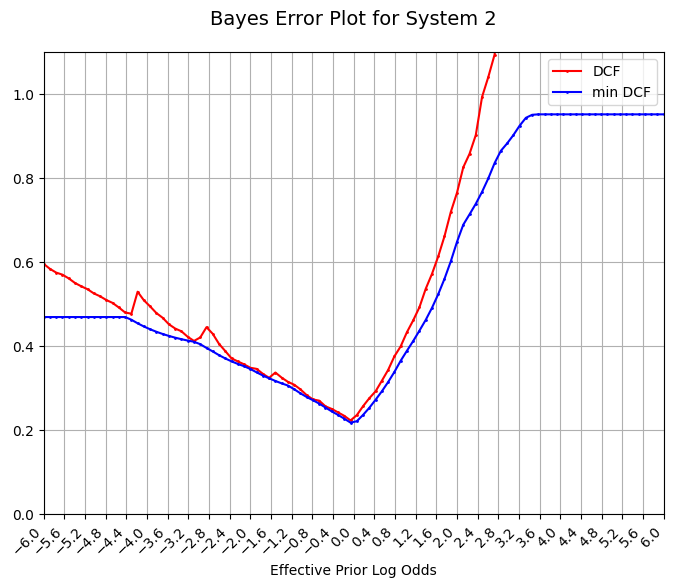

In [11]:
#plot bayes error plots
effPriorLogOdds = np.linspace(-6, 6, 100)
plotBayesErrorPlots(effPriorLogOdds, scores_1, LVAL, title="Bayes Error Plot for System 1")
plotBayesErrorPlots(effPriorLogOdds, scores_2, LVAL, title="Bayes Error Plot for System 2")

We can observe reasonably good calibration for system 2 for low target
prior applications, but bad calibration for high target prior application and overall bad calibration for
system 1. We also observe that system 1 has better **discrimination potential** (because it has a lower $\text{min DCF}$!) than system 2, but the
calibration loss of system 1 brings its performance close to that of system 2.

### Calibration — Single-fold approach

To estimate the calibration parameters we require a labeled training set (calibration training set). To
assess the quality of the transformation, we can then compute actual and minimum DCFs of calibrated
scores. To avoid bias in our results, the calibration training set and the calibration validation set should
be different. We start analyzing a simple set-up based on our usual split of training-validation samples.
In this case, the split is applied to our scores dataset (which may, for example, be one of the validation
sets we employed in previous laboratories). <br>
**For this laboratory, we simply take every third score for calibration training, and the remaining two thirds as calibration validation.**

In [12]:
#split the scores into two sets, calibration set and calibration validation set
SCAL1, SVAL1 = scores_1[::3], np.hstack([scores_1[1::3], scores_1[2::3]])
SCAL2, SVAL2 = scores_2[::3], np.hstack([scores_2[1::3], scores_2[2::3]])
print(f"Shape of SCAL1: {SCAL1.shape}, SVAL1: {SVAL1.shape}")
print(f"Shape of SCAL2: {SCAL2.shape}, SVAL2: {SVAL2.shape}")

LCAL, LVAL = LVAL[::3], np.hstack([LVAL[1::3], LVAL[2::3]]) # Labels
print(f"Shape of LCAL: {LCAL.shape}, LVAL: {LVAL.shape}")

Shape of SCAL1: (667,), SVAL1: (1333,)
Shape of SCAL2: (667,), SVAL2: (1333,)
Shape of LCAL: (667,), LVAL: (1333,)


SCAL1, SVAL1 are the calibration training and calibration validation set for system 1, and similarly for
SCAL1, SVAL1 and system 2. <br>
Since the calibration validation set is a subset of the whole dataset of scores, we start re-evaluating the
performance of the systems on this new validation set. <br>
NOTE: we cannot directly compare the results with those of the previous section, since we changed the
validation set. <br>
So, we recompute actual $\text{DCF}$ (**there's no need to recompute $\text{min DCF}$, as affine transformations do not change it!**) and plot again the Bayes Error Plots for both system:

DCF for System 1 (raw scores, calibration validation set): 0.274
DCF for System 2 (raw scores, calibration validation set): 0.329
minDCF for System 1 (raw scores, calibration validation set): 0.182
minDCF for System 2 (raw scores, calibration validation set): 0.311


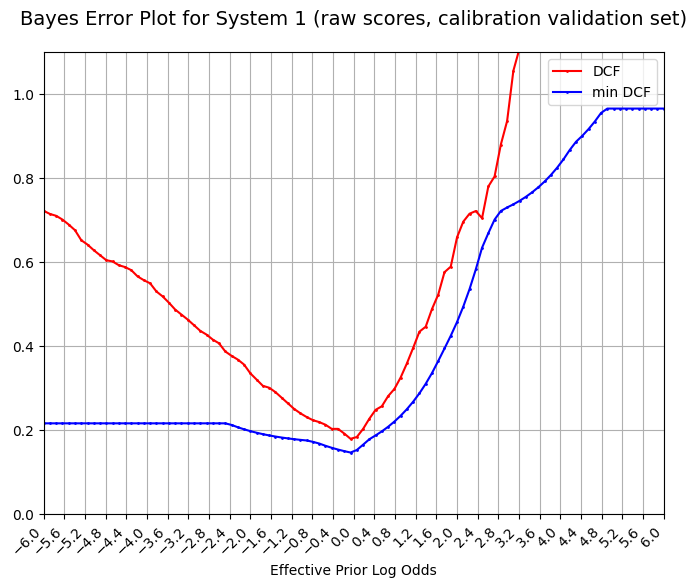

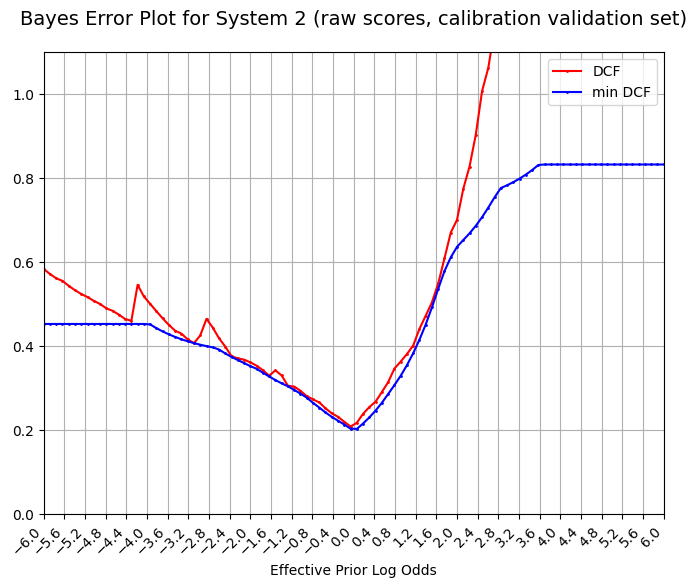

In [13]:
DCF_1_val = computeEmpiricalBayesRisk_Normalized(SVAL1, LVAL, appPriorTrue, 1.0, 1.0)
DCF_2_val = computeEmpiricalBayesRisk_Normalized(SVAL2, LVAL, appPriorTrue, 1.0, 1.0)
#minDCF are the same! Because they are not influence by affine transformations
minDCF_1_val = computeMinEmpiricalBayesRisk_Normalized(SVAL1, LVAL, appPriorTrue, 1.0, 1.0)
minDCF_2_val = computeMinEmpiricalBayesRisk_Normalized(SVAL2, LVAL, appPriorTrue, 1.0, 1.0)
print(f"DCF for System 1 (raw scores, calibration validation set): {DCF_1_val:.3f}")
print(f"DCF for System 2 (raw scores, calibration validation set): {DCF_2_val:.3f}")
print(f"minDCF for System 1 (raw scores, calibration validation set): {minDCF_1_val:.3f}")
print(f"minDCF for System 2 (raw scores, calibration validation set): {minDCF_2_val:.3f}")

#bayes error plots for calibration set, raw scores
plotBayesErrorPlots(effPriorLogOdds, SVAL1, LVAL, title="Bayes Error Plot for System 1 (raw scores, calibration validation set)")
plotBayesErrorPlots(effPriorLogOdds, SVAL2, LVAL, title="Bayes Error Plot for System 2 (raw scores, calibration validation set)")


## Score-level fusion

We now train a **Prior-weighted, non regularized Logistic Regression model on the scores (considering them as samples) of the Calibration Set**. Then, after we estimated the best LR parameters $\alpha$, $\beta$, we can compute the following affine transformation to calibrate our raw (uncalibrated) scores:
$$
S_{cal} = f(S_u) = \alpha S_u + \beta - \log \frac{\pi_T}{1 - \pi_T}
$$
This is equal to:
$$
S_{cal} = \alpha S_u + \gamma \qquad \text{where} \quad \gamma = \beta - \log \frac{\pi_T}{1 - \pi_T}
$$
So, as said, we estimate these paramters using a prior weighted, non regularized Logistic Regresion model for the uncalibrated scores, which has the following objective,the average Loss Function:
$$
\mathcal{J}(\alpha, \beta) = \frac{1}{n} \sum_{i = 1}^n \xi_i \log \left( 1 + e^{-z_i \left( \alpha S_u + \beta\right)}\right) \qquad \text{where} \quad \xi_i =
\begin{cases}
\frac{\pi_T}{n_T} \quad \text{if } z_i = 1 \\[0.75em]
\frac{1- \pi_T}{1 - n_T} \quad \text{if } z_i = -1
\end{cases}
$$
So, since we just have two classes:
$$
\mathcal{J}(\alpha, \beta) = \frac{1}{n} \left[ \frac{\pi_T}{n_T} \sum_{i = 1 \mid c_i = H_T} \log \left( 1 + e^{- \left( \alpha S_u + \beta\right)}\right)
+ \frac{1-\pi_T}{1-n_T} \sum_{i = 1 \mid c_i = H_F} \log \left( 1 + e^{\left( \alpha S_u + \beta\right)} \right)\right]
$$
Regularization in this case is not needed (i.e. $\lambda = 0$), because the scores are just **1-dimensional**, and if, like in this case, we have a sufficient quantity of samples (at least 100 we would say), **the risk of overfitting is fairly minimal**.

Shape of SCAL1_2D: (1, 667)
alpha: [0.93700255], beta: 0.3276692837797854
DCF for System 1 (calibrated scores, calibration validation set): 0.206


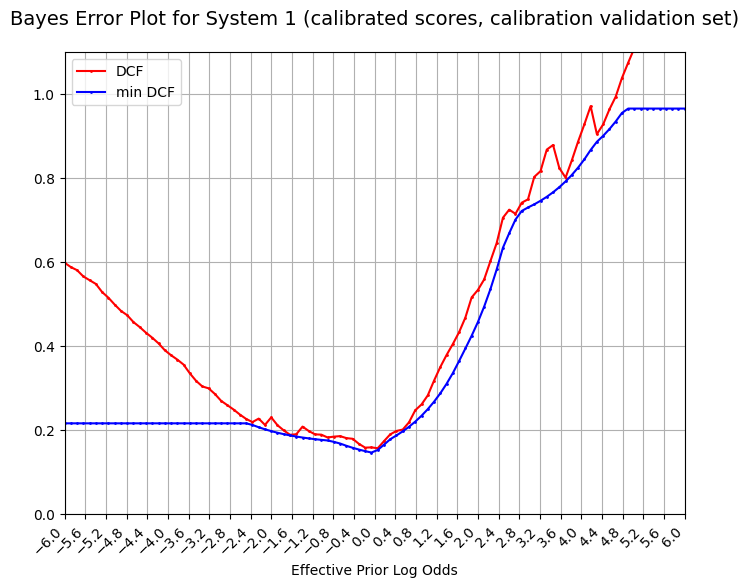

In [14]:
# CALIBRATION MODEL FOR SYSTEM 1

"""
in the labs we assumed scores are 1-D arrays, whereas logistic regression works with 2-D arrays. In our case, we would need to reshape the scores to a 1 × n 2-D ndarray
before training the model
"""

#reshape scores to 2-D arrays
SCAL1_2D = vrow(SCAL1)
print(f"Shape of SCAL1_2D: {SCAL1_2D.shape}")
SVAL1_2D = vrow(SVAL1)
#we calibrate for prior true 0.2
pT = 0.2
#no regularitazion term, so lambda = l = 0
alpha_1, beta_1, _ = trainLogReg_PriorWeighted(SCAL1_2D, LCAL, l = 0, manual_grad=True, PriorTrue=pT)
print(f"alpha: {alpha_1}, beta: {beta_1}")

#now we construct the decision surface, linear
#these are the CALIBRATED SCORES
priorLogOdds = np.log(pT / (1 - pT))  # log odds for prior true
calibrated_SVAL1 = (alpha_1 @ SVAL1_2D + beta_1 - priorLogOdds).ravel() #ravel to go back to 1-D array (since SCAL1_2D, SVAL1_2D are 2-D arrays)
#we now use the Calibration Validation Set to compute the DCF for the calibrated scores
DCF_1_calibrated = computeEmpiricalBayesRisk_Normalized(calibrated_SVAL1, LVAL, pT, 1.0, 1.0)
print(f"DCF for System 1 (calibrated scores, calibration validation set): {DCF_1_calibrated:.3f}")

#bayes error plot for calibrated scores of system 1
plotBayesErrorPlots(effPriorLogOdds, calibrated_SVAL1, LVAL, title="Bayes Error Plot for System 1 (calibrated scores, calibration validation set)")

Shape of SCAL2_2D: (1, 667)
alpha: [0.71925127], beta: -0.5922938929142204
DCF for System 2 (calibrated scores, calibration validation set): 0.336


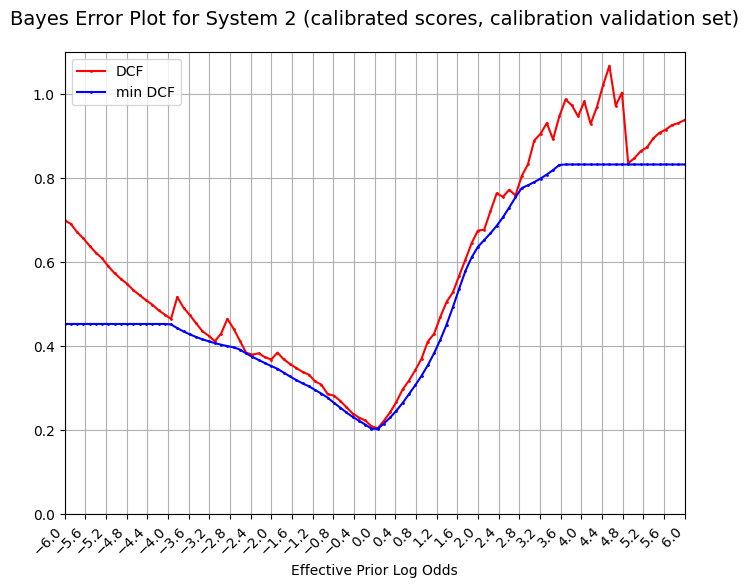

In [15]:
# CALIBRATION MODEL FOR SYSTEM 2

#reshape scores to 2-D arrays
SCAL2_2D = vrow(SCAL2)
print(f"Shape of SCAL2_2D: {SCAL2_2D.shape}")
SVAL2_2D = vrow(SVAL2)
#we calibrate for prior true 0.2
#no regularitazion term, so lambda = l = 0
alpha_2, beta_2, _ = trainLogReg_PriorWeighted(SCAL2_2D, LCAL, l = 0, manual_grad=True, PriorTrue=pT)
print(f"alpha: {alpha_2}, beta: {beta_2}")
#now we construct the decision surface, linear
priorLogOdds = np.log(pT / (1 - pT))  # log odds for prior true
calibrated_SVAL2 = (alpha_2 @ SVAL2_2D + beta_2 - priorLogOdds).ravel()  # ravel to go back to 1-D array
#we now use the Calibration Validation Set to compute the DCF for the calibrated scores
DCF_2_calibrated = computeEmpiricalBayesRisk_Normalized(calibrated_SVAL2, LVAL, pT, 1.0, 1.0)
print(f"DCF for System 2 (calibrated scores, calibration validation set): {DCF_2_calibrated:.3f}")
#bayes error plot for calibrated scores of system 2
plotBayesErrorPlots(effPriorLogOdds, calibrated_SVAL2, LVAL, title="Bayes Error Plot for System 2 (calibrated scores, calibration validation set)")

### Calibration — Single-fold approach - Calibration on held-out Evaluation Set

Now we calibrate the scores for both system in an additional, held out Evaluation Set. <br>
For this, we must simply apply the trained model (so, with the parameters $\alpha$, $\beta$ estimated before) to the evaluation scores, and compute the metrics over the calibrated evaluation scores (**we must not train anything using the evaluation scores, in order not to add bias!**)

Shape of scores_eval_1: (1500,)
DCF for System 1 (calibrated scores, evaluation set): 0.225
minDCF for System 1 (calibrated scores, evaluation set): 0.205


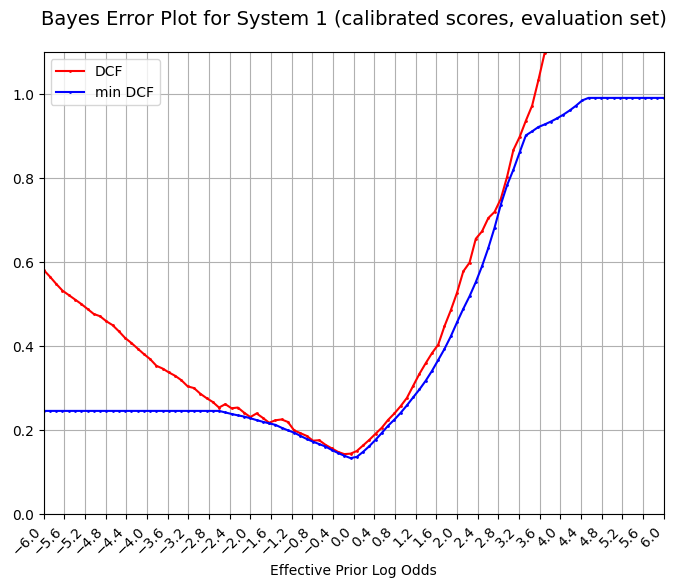

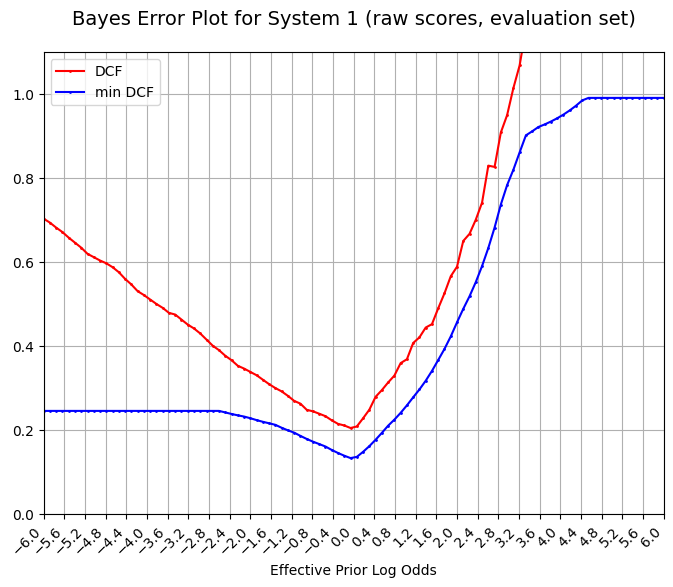

In [16]:
#apply the model on evaluation set


#SYSTEM 1 - EVAL SET CALIBRATION

#load evaluation set scores
scores_eval_1 = np.load("../data/eval_scores_1.npy")
print(f"Shape of scores_eval_1: {scores_eval_1.shape}")
#load evaluation set labels
labels_eval = np.load("../data/eval_labels.npy")
#apply the model on evaluation set
priorLogOdds = np.log(pT / (1 - pT))
calibrated_EVAL_scores_1 = (alpha_1 @ vrow(scores_eval_1) + beta_1 - priorLogOdds).ravel()  # ravel to go back to 1-D array
#compute DCF for the calibrated scores on evaluation set
DCF_eval_1 = computeEmpiricalBayesRisk_Normalized(calibrated_EVAL_scores_1, labels_eval, pT, 1.0, 1.0)
print(f"DCF for System 1 (calibrated scores, evaluation set): {DCF_eval_1:.3f}")
minDCF_eval_1 = computeMinEmpiricalBayesRisk_Normalized(calibrated_EVAL_scores_1, labels_eval, pT, 1.0, 1.0)
print(f"minDCF for System 1 (calibrated scores, evaluation set): {minDCF_eval_1:.3f}")
#bayes error plot for calibrated scores of system 1 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, calibrated_EVAL_scores_1, labels_eval, title="Bayes Error Plot for System 1 (calibrated scores, evaluation set)")
#bayes error plot for raw scores of system 1 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, scores_eval_1, labels_eval, title="Bayes Error Plot for System 1 (raw scores, evaluation set)")


Shape of scores_eval_2: (1500,)
DCF for System 2 (calibrated scores, evaluation set): 0.312
minDCF for System 2 (calibrated scores, evaluation set): 0.280


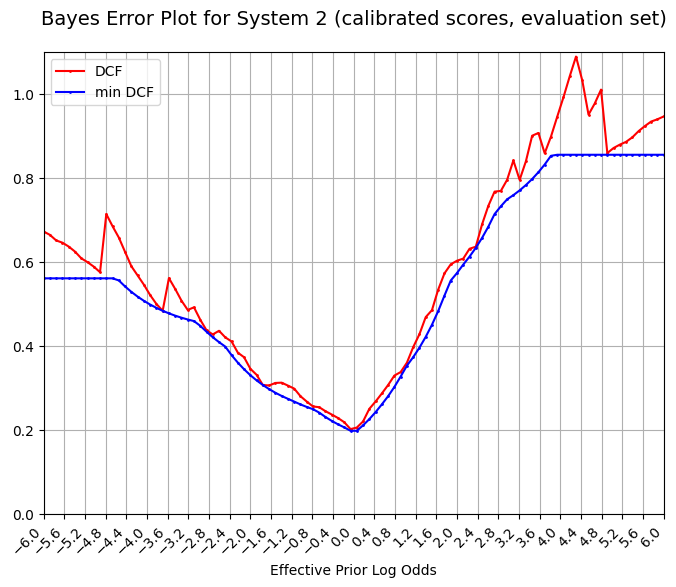

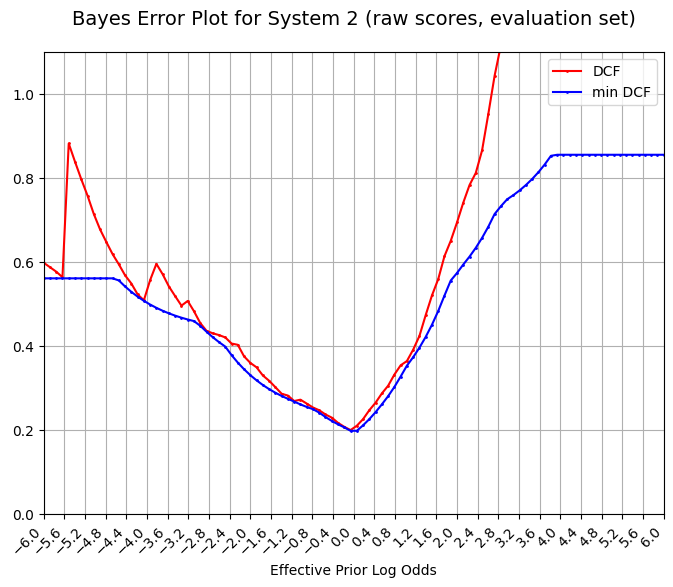

In [18]:
#apply the model on evaluation set


# CALIBRATION ON EVAL SET FOR SYSTEM 2

#load evaluation set scores
scores_eval_2 = np.load("../data/eval_scores_2.npy")
print(f"Shape of scores_eval_2: {scores_eval_2.shape}")
#apply the model on evaluation set
calibrated_EVAL_scores_2 = (alpha_2 @ vrow(scores_eval_2) + beta_2 - priorLogOdds).ravel()  # ravel to go back to 1-D array
#compute DCF for the calibrated scores on evaluation set
DCF_eval_2 = computeEmpiricalBayesRisk_Normalized(calibrated_EVAL_scores_2, labels_eval, pT, 1.0, 1.0)
print(f"DCF for System 2 (calibrated scores, evaluation set): {DCF_eval_2:.3f}")
minDCF_eval_2 = computeMinEmpiricalBayesRisk_Normalized(calibrated_EVAL_scores_2, labels_eval, pT, 1.0, 1.0)
print(f"minDCF for System 2 (calibrated scores, evaluation set): {minDCF_eval_2:.3f}")
#bayes error plot for calibrated scores of system 2 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, calibrated_EVAL_scores_2, labels_eval, title="Bayes Error Plot for System 2 (calibrated scores, evaluation set)")
#bayes error plots of raw scores on evaluation set
plotBayesErrorPlots(effPriorLogOdds, scores_eval_2, labels_eval, title="Bayes Error Plot for System 2 (raw scores, evaluation set)")

We can
observe that our calibration was not effective for system 2, and actually cost us almost 10% more than
using the raw scores directly. For system 1, on the other hand, our approach was effective.


### Calibration — K-fold approach
We now turn our attention to a K-fold scheme for calibration training. In this case, our reference scores are the original, non-calibrated scores of the whole scores dataset.

**Divide the dataset in K folds**. Here we will use K = 5. As for single-fold splits, we should first shuffle the scores, to ensure that we have similar distributions of scores over the different folds. For the provided dataset we can skip this step, and simply compute each fold as S[idx::KFOLD], L[idx::KFOLD], where S and L are the 1-D array of scores and of labels, idx is the fold index and KFOLD = 5.

**Iteratively train models M1...M5, each leaving out one of the five folds during training, and apply them on the held-out fold.** This will provide 5 arrays of scores SCAL1 ... SCAL5, with corresponding labels given by L[0::5] ... L[4::5].

**Stack together the arrays of scores to build a single, 1-D pooled array SCAL = numpy.hstack([S1 ... S5]) (pseudo-code), and build the corresponding label array LCAL = numpy.hstack([L[0::5] ... L[4::5]]) (pseudo-code).** Compute the actual and minimum DCF, and visualize the Bayes error plots for the pooled scores.

When using a K-fold approach, we use the validation results to make all decisions on the model (model selection, hyper-parameters, ...). However, once we have selected the methodology, we still have K models, and we cannot directly choose any of them by simply comparing their performance — although we
could compute the metrics for each fold, since different folds contain different data we would not know
if the performance differences are due to the model or the data itself. A possible solution to select a
robust model for our task consists in **training a final additional model M using the whole dataset**, and
the methodology / hyperparameters we selected earlier.

Note: **minDCF of calibrated folds may change** with respect to the one we computed at the beginning over the whole dataset, since we are pooling scores of different folds that have undergone a different affine transformation

In [19]:
scores_sys_1 = np.load('../data/scores_1.npy')
scores_sys_2 = np.load('../data/scores_2.npy')
eval_scores_sys_1 = np.load('../data/eval_scores_1.npy')
eval_scores_sys_2 = np.load('../data/eval_scores_2.npy')
labels = np.load('../data/labels.npy')
eval_labels = np.load('../data/eval_labels.npy')

In [20]:
def extract_folds(D, idx, KFOLD=5):
    """
    Extract folds from the dataset D based on the indices idx.
    So, K-1 folds are used for training and 1 fold for validation.
    Parameters:
    - D (np.ndarray): The dataset from which to extract folds.
    - idx (np.ndarray): Indices indicating which fold each sample belongs to.
    - KFOLD (int): Total number of folds to create.
    Returns:
    - train_folds (np.ndarray): The training folds, which are all samples except those in the validation fold.
    - val_fold (np.ndarray): The validation fold, which contains samples corresponding to the given indices.
    """

    val_fold = D[idx::KFOLD]
    train_folds = np.hstack([D[i::KFOLD] for i in range(KFOLD) if i != idx])

    return train_folds, val_fold



Model M_0 alpha_0: [1.05457863], beta_0: 0.3271344139679797
Model M_1 alpha_1: [1.09600493], beta_1: 0.4363596118633445
Model M_2 alpha_2: [1.09599065], beta_2: 0.44318096065714896
Model M_3 alpha_3: [1.05474297], beta_3: 0.44330161102437365
Model M_4 alpha_4: [1.01487576], beta_4: 0.38103148890045196
minDCF for System 1 (calibrated scores, K-Fold): 0.204


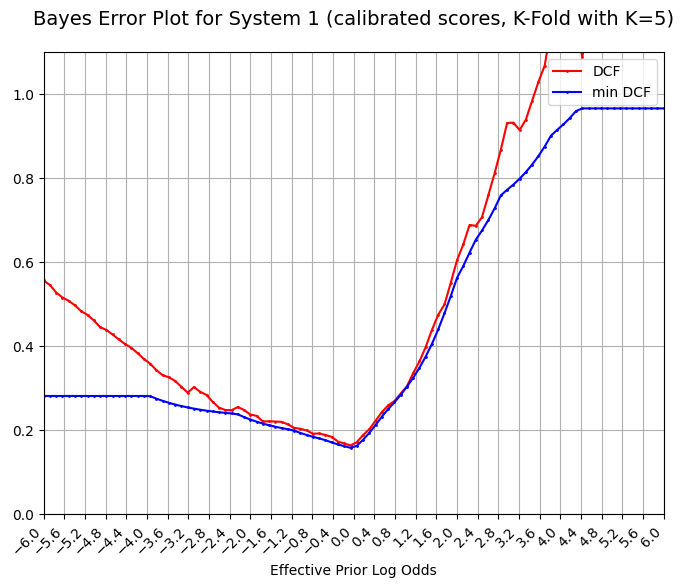

In [21]:
#K FOLD APPROACH
KFOLD = 5 #5 folds

#so, we train 5 models, each one on K-1 = 4 folds, and we validate on the remaining fold
#Note: minDCF of calibrated folds may change with respect to the one we computed at the beginning over the whole dataset, since we are pooling scores of different folds that have undergone a different affine transformation

#SYSTEM 1
calibrated_scores_sys_1 = [] # We will add to the list the scores computed for each fold
labels_sys_1 = [] # We need to ensure that we keep the labels aligned with the scores. The simplest thing to do is to just extract each fold label and pool all the fold labels together in the same order as we pool the corresponding scores.
pT = 0.2 #prior true for class true
priorLogOdds = np.log(pT / (1 - pT))  # log odds for prior true
for val_fold_idx in range(KFOLD):
    #extract folds for scores_sys_1 and labels
    SCAL, SVAL = extract_folds(scores_sys_1, val_fold_idx, KFOLD)
    LCAL, LVAL = extract_folds(labels, val_fold_idx, KFOLD)
    #reshape scores to 2-D arrays in order to feed them to the logistic regression model
    SCAL_2D = vrow(SCAL)
    SVAL_2D = vrow(SVAL)
    #no regularitazion term, so lambda = l = 0
    alpha_i, beta_i, _ = trainLogReg_PriorWeighted(SCAL_2D, LCAL, l = 0, manual_grad=True, PriorTrue=pT)
    print(f"Model M_{val_fold_idx} alpha_{val_fold_idx}: {alpha_i}, beta_{val_fold_idx}: {beta_i}")
    #now apply the model on the validation fold and save it
    calibrated_SVAL = (alpha_i @ SVAL_2D + beta_i - priorLogOdds).ravel()  # ravel to go back to 1-D array
    calibrated_scores_sys_1.append(calibrated_SVAL)
    labels_sys_1.append(LVAL)

#BUILD A FINAL MODEL M ON THE WHOLE DATASET, I.E. HAVING A FINAL SCORE RESULTED FROM COMBINING ALL THE SCORES
#pool the scores and labels together
#i.e. concatenate the scores and labels of each fold, to have a single array of scores and labels
#each entry is related to a sample in the validation set
#so, transform the list of arrays into a single array
calibrated_scores_sys_1 = np.hstack(calibrated_scores_sys_1)
labels_sys_1 = np.hstack(labels_sys_1)

#evaluate the minDCF and DCF for the pooled scores
minDCF_sys_1 = computeMinEmpiricalBayesRisk_Normalized(calibrated_scores_sys_1, labels_sys_1, pT, 1.0, 1.0)
DCF_sys_1 = computeEmpiricalBayesRisk_Normalized(calibrated_scores_sys_1, labels_sys_1, pT, 1.0, 1.0)
print(f"minDCF for System 1 (calibrated scores, K-Fold): {minDCF_sys_1:.3f}")
#plot the bayes error plot for the pooled scores
plotBayesErrorPlots(effPriorLogOdds, calibrated_scores_sys_1, labels_sys_1, title=f"Bayes Error Plot for System 1 (calibrated scores, K-Fold with K={KFOLD})")

Model M_0 alpha_0: [0.7036903], beta_0: -0.8229290862343531
Model M_1 alpha_1: [0.74057029], beta_1: -0.767924244556445
Model M_2 alpha_2: [0.74169019], beta_2: -0.7725507312839807
Model M_3 alpha_3: [0.69666415], beta_3: -0.714651785439705
Model M_4 alpha_4: [0.68003305], beta_4: -0.7829508723114207
minDCF for System 2 (calibrated scores, K-Fold): 0.315


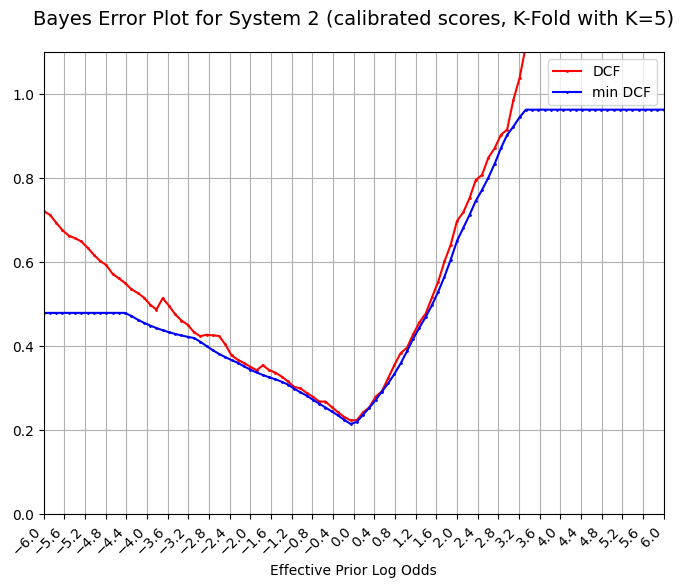

In [22]:
#SYSTEM 2 K FOLD
calibrated_scores_sys_2 = []  # We will add to the list the scores computed for each fold
labels_sys_2 = []  # We need to ensure that we keep the labels aligned with the scores. The simplest thing to do is to just extract each fold label and pool all the fold labels together in the same order as we pool the corresponding scores.
for val_fold_idx in range(KFOLD):
    #extract folds for scores_sys_2 and labels
    SCAL, SVAL = extract_folds(scores_sys_2, val_fold_idx, KFOLD)
    LCAL, LVAL = extract_folds(labels, val_fold_idx, KFOLD)
    #reshape scores to 2-D arrays in order to feed them to the logistic regression model
    SCAL_2D = vrow(SCAL)
    SVAL_2D = vrow(SVAL)
    #no regularitazion term, so lambda = l = 0
    alpha_i, beta_i, _ = trainLogReg_PriorWeighted(SCAL_2D, LCAL, l = 0, manual_grad=True, PriorTrue=pT)
    print(f"Model M_{val_fold_idx} alpha_{val_fold_idx}: {alpha_i}, beta_{val_fold_idx}: {beta_i}")
    #now apply the model on the validation fold and save it
    calibrated_SVAL = (alpha_i @ SVAL_2D + beta_i - priorLogOdds).ravel()  # ravel to go back to 1-D array
    calibrated_scores_sys_2.append(calibrated_SVAL)
    labels_sys_2.append(LVAL)

#BUILD A FINAL MODEL M ON THE WHOLE DATASET, I.E. HAVING A FINAL SCORE RESULTED FROM COMBINING ALL THE SCORES
#pool the scores and labels together
#i.e. concatenate the scores and labels of each fold, to have a single array of scores and labels
#each entry is related to a sample in the validation set
#so, transform the list of arrays into a single array
calibrated_scores_sys_2 = np.hstack(calibrated_scores_sys_2)
labels_sys_2 = np.hstack(labels_sys_2)
#evaluate the minDCF and DCF for the pooled scores
minDCF_sys_2 = computeMinEmpiricalBayesRisk_Normalized(calibrated_scores_sys_2, labels_sys_2, pT, 1.0, 1.0)
DCF_sys_2 = computeEmpiricalBayesRisk_Normalized(calibrated_scores_sys_2, labels_sys_2, pT, 1.0, 1.0)
print(f"minDCF for System 2 (calibrated scores, K-Fold): {minDCF_sys_2:.3f}")
#plot the bayes error plot for the pooled scores
plotBayesErrorPlots(effPriorLogOdds, calibrated_scores_sys_2, labels_sys_2, title=f"Bayes Error Plot for System 2 (calibrated scores, K-Fold with K={KFOLD})")

**We instantly observe that these results are more calibrated than the ones using the single-fold approach**. This can be explained by the fact that with K-Fold, we train each sub-model $M_i$ with K-1 folds and then combine all the pooled scores together to create a final model $M$. On the other hand, with the single-fold approach we split the original Validation Set into: 1) Calibration Set (1/3), 2) Calibration Validation Set (2/3), so the prior-weighted L.R. model is trained over a **smaller training dataset!**

### Calibration — K-fold approach - Calibration on held-out Evaluation Set
We repeat the analysis on the same held-out Evaluation Set as before. We train the final model $M$ using the whole calibration set. We can then evaluate whether this model would
have been effective using the evaluation set. Apply the model M to evaluation data, and compute the
performance metrics on the latter dataset. **In this case we have no hyperparameters**, since we don't apply regularization, **so we simply retrain model $M$ on Evaluation Set**.

System 1, raw scores on evaluation set: DCF: 0.290, minDCF: 0.205
System 1, calibrated scores on evaluation set: DCF: 0.225, minDCF: 0.205


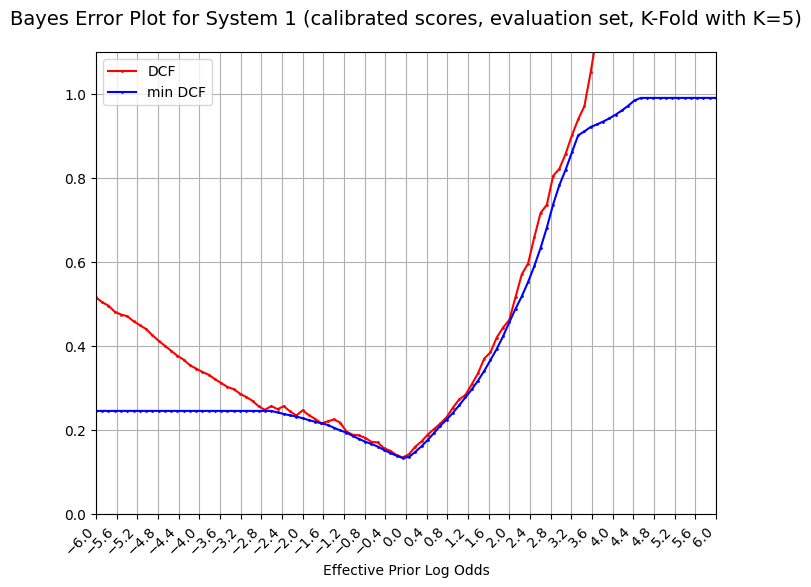

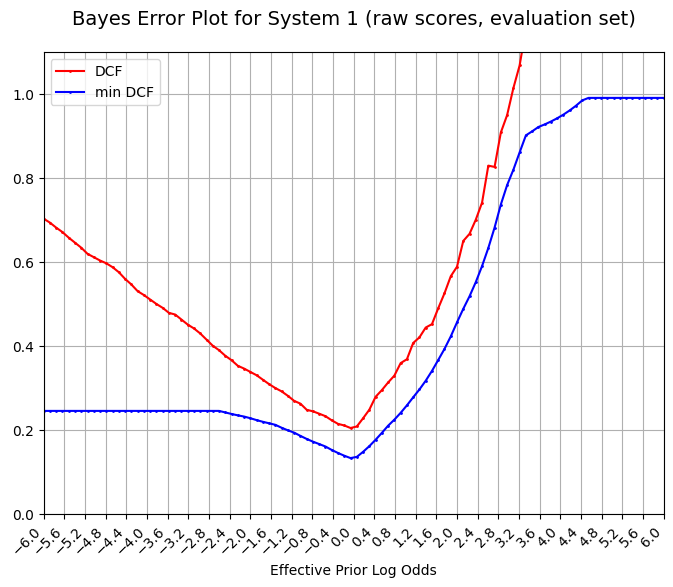

In [23]:
#SYSTEM 1 - EVAL SET K FOLD

#TRAIN THE FIT MODEL M ON EVAL SET SCORES
#reshape raw scores to 2-D array
raw_scores1_2D = vrow(scores_sys_1)
#reshape eval scores to 2-D array
eval_scores_sys_1_2D = vrow(eval_scores_sys_1)
#no regularitazion term, so lambda = l = 0
#WE TRAIN ALWAYS ON CALIBRATION SET, NEVER ON EVALUATION SET!
alpha_M_1, beta_M_1, _ = trainLogReg_PriorWeighted(raw_scores1_2D, labels, l=0, manual_grad=True, PriorTrue=pT)
#apply the model on evaluation set
calibrated_scores_sys_1_eval = (alpha_M_1 @ eval_scores_sys_1_2D + beta_M_1 - priorLogOdds).ravel()  # ravel to go back to 1-D array
#compute DCF for the calibrated scores on evaluation set
DCF_eval_sys_1_no_calibration = computeEmpiricalBayesRisk_Normalized(eval_scores_sys_1, eval_labels, pT, 1.0, 1.0)
minDCF_eval_sys_1_no_calibration = computeMinEmpiricalBayesRisk_Normalized(eval_scores_sys_1, eval_labels, pT, 1.0, 1.0)
DCF_eval_sys_1 = computeEmpiricalBayesRisk_Normalized(calibrated_scores_sys_1_eval, eval_labels, pT, 1.0, 1.0)
minDCF_eval_sys_1 = computeMinEmpiricalBayesRisk_Normalized(calibrated_scores_sys_1_eval, eval_labels, pT, 1.0, 1.0)
print(f"System 1, raw scores on evaluation set: DCF: {DCF_eval_sys_1_no_calibration:.3f}, minDCF: {minDCF_eval_sys_1_no_calibration:.3f}")
print(f"System 1, calibrated scores on evaluation set: DCF: {DCF_eval_sys_1:.3f}, minDCF: {minDCF_eval_sys_1:.3f}")

#bayes error plot for calibrated scores of system 1 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, calibrated_scores_sys_1_eval, eval_labels, title=f"Bayes Error Plot for System 1 (calibrated scores, evaluation set, K-Fold with K={KFOLD})")
#bayes error plot for raw scores of system 1 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, eval_scores_sys_1, eval_labels, title="Bayes Error Plot for System 1 (raw scores, evaluation set)")

System 2, raw scores on evaluation set: DCF: 0.284, minDCF: 0.280
System 2, calibrated scores on evaluation set: DCF: 0.283, minDCF: 0.280


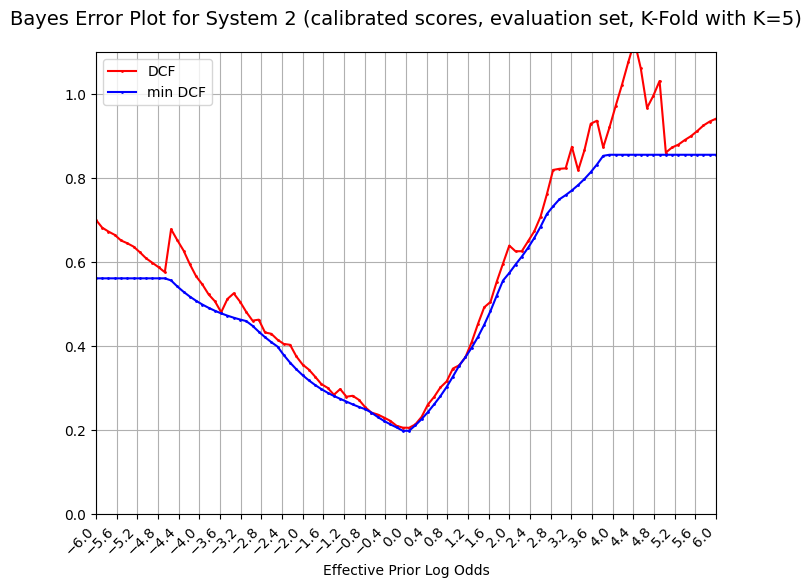

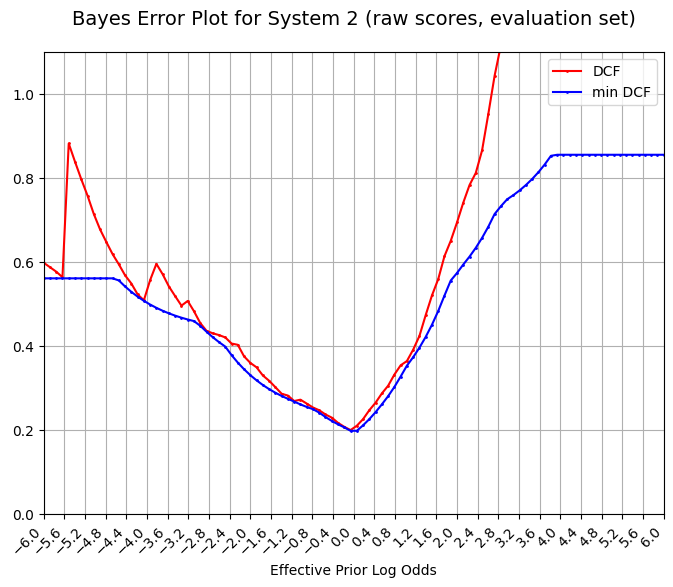

In [24]:
# SYSTEM 2 - EVAL SET K FOLD
#FIT THE FINAL MODEL M ON EVAL SET SCORES
#reshape training raw score to 2-D array
raw_scores2_2D = vrow(scores_sys_2)
#reshape eval scores to 2-D array
eval_scores_sys_2_2D = vrow(eval_scores_sys_2)
#WE TRAIN ALWAYS ON CALIBRATION SET, NEVER ON EVALUATION SET!
#no regularitazion term, so lambda = l = 0
alpha_M_2, beta_M_2, _ = trainLogReg_PriorWeighted(raw_scores2_2D, labels, l=0, manual_grad=True, PriorTrue=pT)
#apply the model on evaluation set
calibrated_scores_sys_2_eval = (alpha_M_2 @ eval_scores_sys_2_2D + beta_M_2 - priorLogOdds).ravel()  # ravel to go back to 1-D array
#compute DCF for the calibrated scores on evaluation set
DCF_eval_sys_2_no_calibration = computeEmpiricalBayesRisk_Normalized(eval_scores_sys_2, eval_labels, pT, 1.0, 1.0)
minDCF_eval_sys_2_no_calibration = computeMinEmpiricalBayesRisk_Normalized(eval_scores_sys_2, eval_labels, pT, 1.0, 1.0)
DCF_eval_sys_2 = computeEmpiricalBayesRisk_Normalized(calibrated_scores_sys_2_eval, eval_labels, pT, 1.0, 1.0)
minDCF_eval_sys_2 = computeMinEmpiricalBayesRisk_Normalized(calibrated_scores_sys_2_eval, eval_labels, pT, 1.0, 1.0)
print(f"System 2, raw scores on evaluation set: DCF: {DCF_eval_sys_2_no_calibration:.3f}, minDCF: {minDCF_eval_sys_2_no_calibration:.3f}")
print(f"System 2, calibrated scores on evaluation set: DCF: {DCF_eval_sys_2:.3f}, minDCF: {minDCF_eval_sys_2:.3f}")
#bayes error plot for calibrated scores of system 2 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, calibrated_scores_sys_2_eval, eval_labels, title=f"Bayes Error Plot for System 2 (calibrated scores, evaluation set, K-Fold with K={KFOLD})")
#bayes error plot for raw scores of system 2 on evaluation set
plotBayesErrorPlots(effPriorLogOdds, eval_scores_sys_2, eval_labels, title="Bayes Error Plot for System 2 (raw scores, evaluation set)")

### Score-level fusion

Now, we can even "fuse", so put together the score given by both the first and the second model. This extends the calibration approach, because we do the same but in this case we have a **matrix** of scores instead of a vector. On the columns we always have the samples, as before, whereas each row represents the scores vector for a given Recognizer. <br>
Then, we compute the fused scores this way:
$$
S_{\text{fused}} = \mathbf{\alpha}^T \mathbf{S_u} + \gamma
$$
This is, again, an **affine transformation**, so we can resort again to the prior-wrighted Logistic Regression to compute the parameters. <br>
So, basically fusion extends calibration. In fact, if we just had one Recognizer, this approach would result in calibration.

### Fusion, Single Fold approach

In [27]:
#load scores_1
scores_1 = np.load("../data/scores_1.npy")
print(f"Shape of scores_1: {scores_1.shape}")
#load scores_2
scores_2 = np.load("../data/scores_2.npy")
print(f"Shape of scores_2: {scores_2.shape}")

#load LVAL, so validation labels
LVAL = np.load("../data/labels.npy")
print(f"Shape of LVAL: {LVAL.shape}")

#split the scores into two sets, calibration set and calibration validation set
SCAL1, SVAL1 = scores_1[::3], np.hstack([scores_1[1::3], scores_1[2::3]])
SCAL2, SVAL2 = scores_2[::3], np.hstack([scores_2[1::3], scores_2[2::3]])
print(f"Shape of SCAL1: {SCAL1.shape}, SVAL1: {SVAL1.shape}")
print(f"Shape of SCAL2: {SCAL2.shape}, SVAL2: {SVAL2.shape}")

LCAL, LVAL = LVAL[::3], np.hstack([LVAL[1::3], LVAL[2::3]]) # Labels
print(f"Shape of LCAL: {LCAL.shape}, LVAL: {LVAL.shape}")

Shape of scores_1: (2000,)
Shape of scores_2: (2000,)
Shape of LVAL: (2000,)
Shape of SCAL1: (667,), SVAL1: (1333,)
Shape of SCAL2: (667,), SVAL2: (1333,)
Shape of LCAL: (667,), LVAL: (1333,)


We build the matrix of scores, as features, by stacking the row vectors of SCAL1 and SCAL2:

Fusion of System1 and System2: minDCF: 0.161, DCF: 0.161


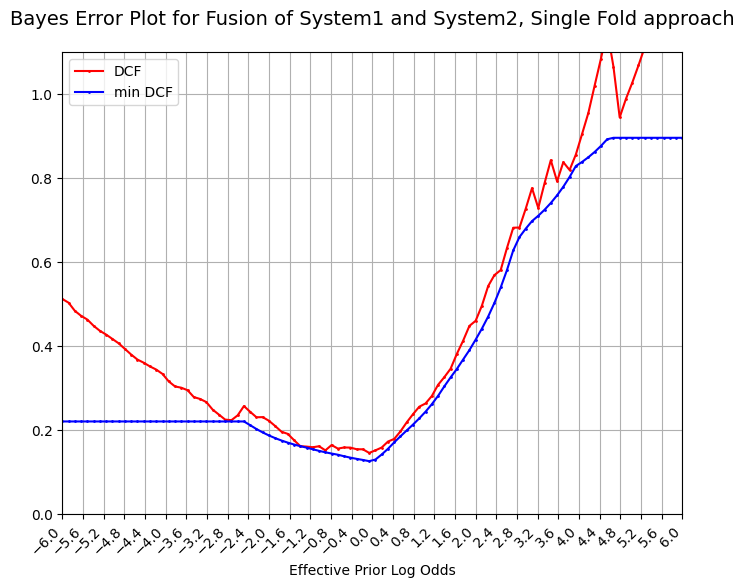

In [28]:
#Train a score model to return the fused scores
pT = 0.2
alpha_fused_sf, beta_fused_sf, _ = trainLogReg_PriorWeighted(np.vstack([SCAL1, SCAL2]), LCAL, l = 0, manual_grad=True, PriorTrue=pT)

#compute fused scores
#remember to also stack both SVAL1 and SVAL2 into a matrix
priorLogOdds = np.log(pT /(1 - pT))
S_fused_sf = (vrow(alpha_fused_sf) @ np.vstack([SVAL1, SVAL2]) + beta_fused_sf - priorLogOdds).ravel()

#compute minDCf, DCf
DCF_fused_sf = computeEmpiricalBayesRisk_Normalized(S_fused_sf, LVAL, pT, 1.0, 1.0)
minDCF_fused_sf = computeMinEmpiricalBayesRisk_Normalized(S_fused_sf, LVAL, pT, 1.0, 1.0)
print(f"Fusion of System1 and System2: minDCF: {minDCF_fused_sf:.3f}, DCF: {DCF_fused_sf:.3f}")
#print bayes error plot of fused scores
plotBayesErrorPlots(effPriorLogOdds, S_fused_sf, LVAL, title=f"Bayes Error Plot for Fusion of System1 and System2, Single Fold approach")

### Fusion, K-Fold approach

In [29]:
scores_sys_1 = np.load('../data/scores_1.npy')
scores_sys_2 = np.load('../data/scores_2.npy')
eval_scores_sys_1 = np.load('../data/eval_scores_1.npy')
eval_scores_sys_2 = np.load('../data/eval_scores_2.npy')
labels = np.load('../data/labels.npy')
eval_labels = np.load('../data/eval_labels.npy')

Fusion of System1, System2, K-Fold with K = 5, metrics on pooled scores: minDCF = 0.177, DCF = 0.185


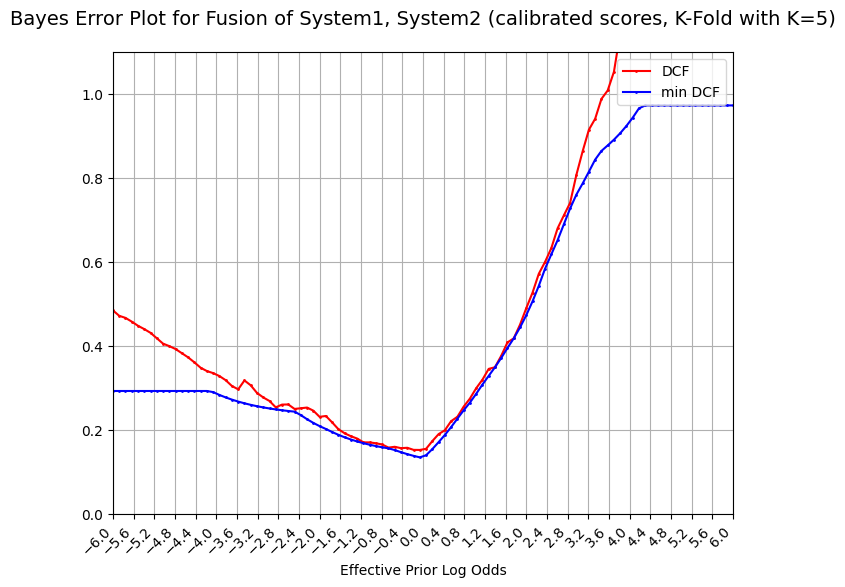

In [30]:
scores_fused_kf = []
labels_fused_kf = []
pT = 0.2
priorLogOdds = np.log((pT) / (1-pT))
for val_fold_idx in range(KFOLD):
    #extract the validation fold and the K-1 calibration folds for our score model
    #then stack [SCAL1, SCAL2] and [SVAL1, SVAL2]
    SCAL1, SVAL1 = extract_folds(scores_sys_1, val_fold_idx, KFOLD)
    SCAL2, SVAL2 = extract_folds(scores_sys_2, val_fold_idx, KFOLD)
    LCAL, LVAL = extract_folds(labels, val_fold_idx, KFOLD)

    #train prior-weighted L.R. on the K-1 fold
    #stack [SCAL1, SCAL2]!
    alpha_i, beta_i, _ = trainLogReg_PriorWeighted(np.vstack([SCAL1, SCAL2]), LCAL, l = 0, manual_grad=True, PriorTrue=pT)
    #apply model to the remaining validation fold, given by SVAL1, SVAL2 stacked
    calibrated_fused_SVAL = (vrow(alpha_i) @ np.vstack([SVAL1, SVAL2]) + beta_i - priorLogOdds).ravel()
    #add to the pool of fused scores
    scores_fused_kf.append(calibrated_fused_SVAL)
    #add LVAL to the pool of labels
    labels_fused_kf.append(LVAL)

#Then, compute minDCF and DCF for the pooled scores
scores_fused_kf = np.hstack(scores_fused_kf)
labels_fused_kf = np.hstack(labels_fused_kf)

minDCF_fused_kf = computeMinEmpiricalBayesRisk_Normalized(scores_fused_kf, labels_fused_kf, pT, 1.0, 1.0)
DCF_fused_kf = computeEmpiricalBayesRisk_Normalized(scores_fused_kf, labels_fused_kf, pT, 1.0, 1.0)
print(f"Fusion of System1, System2, K-Fold with K = {KFOLD}, metrics on pooled scores: minDCF = {minDCF_fused_kf:.3f}, DCF = {DCF_fused_kf:.3f}")
#compute bayes error plots
plotBayesErrorPlots(effPriorLogOdds, scores_fused_kf, labels_fused_kf, title=f"Bayes Error Plot for Fusion of System1, System2 (calibrated scores, K-Fold with K={KFOLD})")


Model M used on eavluation set, metrics: minDCF=0.178, DCF=0.189


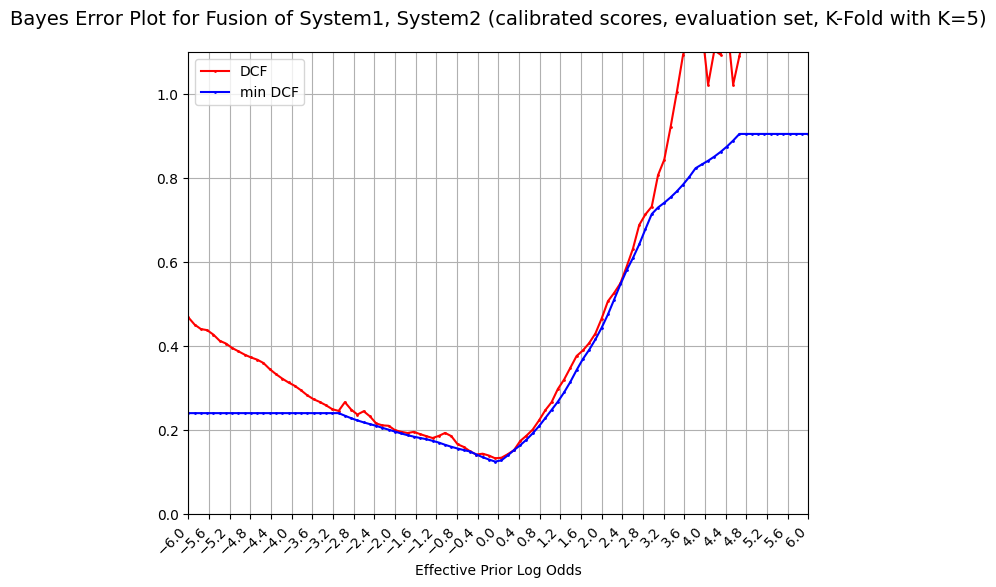

In [31]:
#Now we train a model M over the whole trainin set, and then use it on evaluation set

alpha_M_fused, beta_M_fused, _ = trainLogReg_PriorWeighted(np.vstack([scores_sys_1, scores_sys_2]), labels, l=0, manual_grad=True, PriorTrue=pT)

#now use the model to calibrate evaluation scores
#also here remember to stack eval_scores_1 and eval_scores2 together
priorLogOdds = np.log(pT / (1 - pT))
S_eval_fused = (vrow(alpha_M_fused) @ np.vstack([eval_scores_sys_1, eval_scores_sys_2]) + beta_M_fused - priorLogOdds).ravel()
#compute minDCF, DCF on evaluation set
DCF_eval_fused = computeEmpiricalBayesRisk_Normalized(S_eval_fused, eval_labels, pT, 1.0, 1.0)
minDCF_eval_fused= computeMinEmpiricalBayesRisk_Normalized(S_eval_fused, eval_labels, pT, 1.0, 1.0)
print(f"Model M used on eavluation set, metrics: minDCF={minDCF_eval_fused:.3f}, DCF={DCF_eval_fused:.3f}")
#compute bayes error plot on evaluation scores for a wider range of application
plotBayesErrorPlots(effPriorLogOdds, S_eval_fused, eval_labels, title=f"Bayes Error Plot for Fusion of System1, System2 (calibrated scores, evaluation set, K-Fold with K={KFOLD})")